<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. Great job! The results look very good.

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project.  
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,


- Would you add small conclusions about each chart in the EDA section? Some of them do not have a conclusion. 




- Would you add small conclusions about each model and their performance  in the `Working with models` section? Same issue: some models do not have a conclusion.


</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for such an excellent job! You showed strong coding skills and a solid understanding of this topic, which is quite hard. I hope you enjoyed working on this project. The updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ If you are interested in Large Language Models, check out [Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g) and Tokenization [lecture](https://www.youtube.com/watch?v=zduSFxRajkE) by Andrej Karpathy, one of the leading scientists in this area.  He has also recently published a nice [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI) tutorial where he explains all LLM preparation stages and a very useful video about how he uses LLM [here](https://www.youtube.com/watch?v=EWvNQjAaOHw&feature=youtu.be). This is a comprehensive guide on how to choose the optimal tool for your tasks while saving time and money.
    
<hr>
    
📌 Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 
</div>

# Sentiment Analysis of IMDB movie Reviews Using Meachine Learning Models.

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done! 
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good introduction! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Please do not forget about project title :) A title should reflect the core goal of the project. 
    
</div>

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm
import torch
import transformers
import sklearn.metrics as metrics

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
display(df_reviews.head())

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
display(df_reviews['review'].head(10))

0    The pakage implies that Warren Beatty and Gold...
1    How the hell did they get this made?! Presenti...
2    There is no real story the film seems more lik...
3    Um .... a serious film about troubled teens in...
4    I'm totally agree with GarryJohal from Singapo...
5    This is the first movie I've seen from Singapo...
6    Yes non-Singaporean's can't see what's the big...
7    This true story of Carlson's Raiders is more o...
8    Should have been titled 'Balderdash!' Little i...
9    The movie 'Gung Ho!': The Story of Carlson's M...
Name: review, dtype: object

In [7]:
display(df_reviews.duplicated().sum())

0

In [8]:
display(df_reviews.isnull().sum())

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [9]:
missing_rows = df_reviews[df_reviews['average_rating'].isnull() | df_reviews['votes'].isnull()]
missing_percentage = (len(missing_rows) / len(df_reviews)) *100
print(f'Missing rows:{len(missing_rows)} ({missing_percentage:.2f}%) ')

Missing rows:2 (0.00%) 


In [10]:
df_reviews = df_reviews.dropna()

In [11]:
display(df_reviews.describe())

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47329.000000,47329.000000,47329.000000,4.732900e+04,47329.000000,47329.000000,47329.000000
mean,1989.630882,0.001733,5.998278,2.556292e+04,5.484439,0.498933,6279.826808
std,19.600702,0.041588,1.494289,8.367004e+04,3.473083,0.500004,3605.724280
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6300.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


In [12]:
display(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1),

None

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
`display` works better than `print` with dataframes.     
</div>

## EDA

Let's check the number of movies and reviews over years.

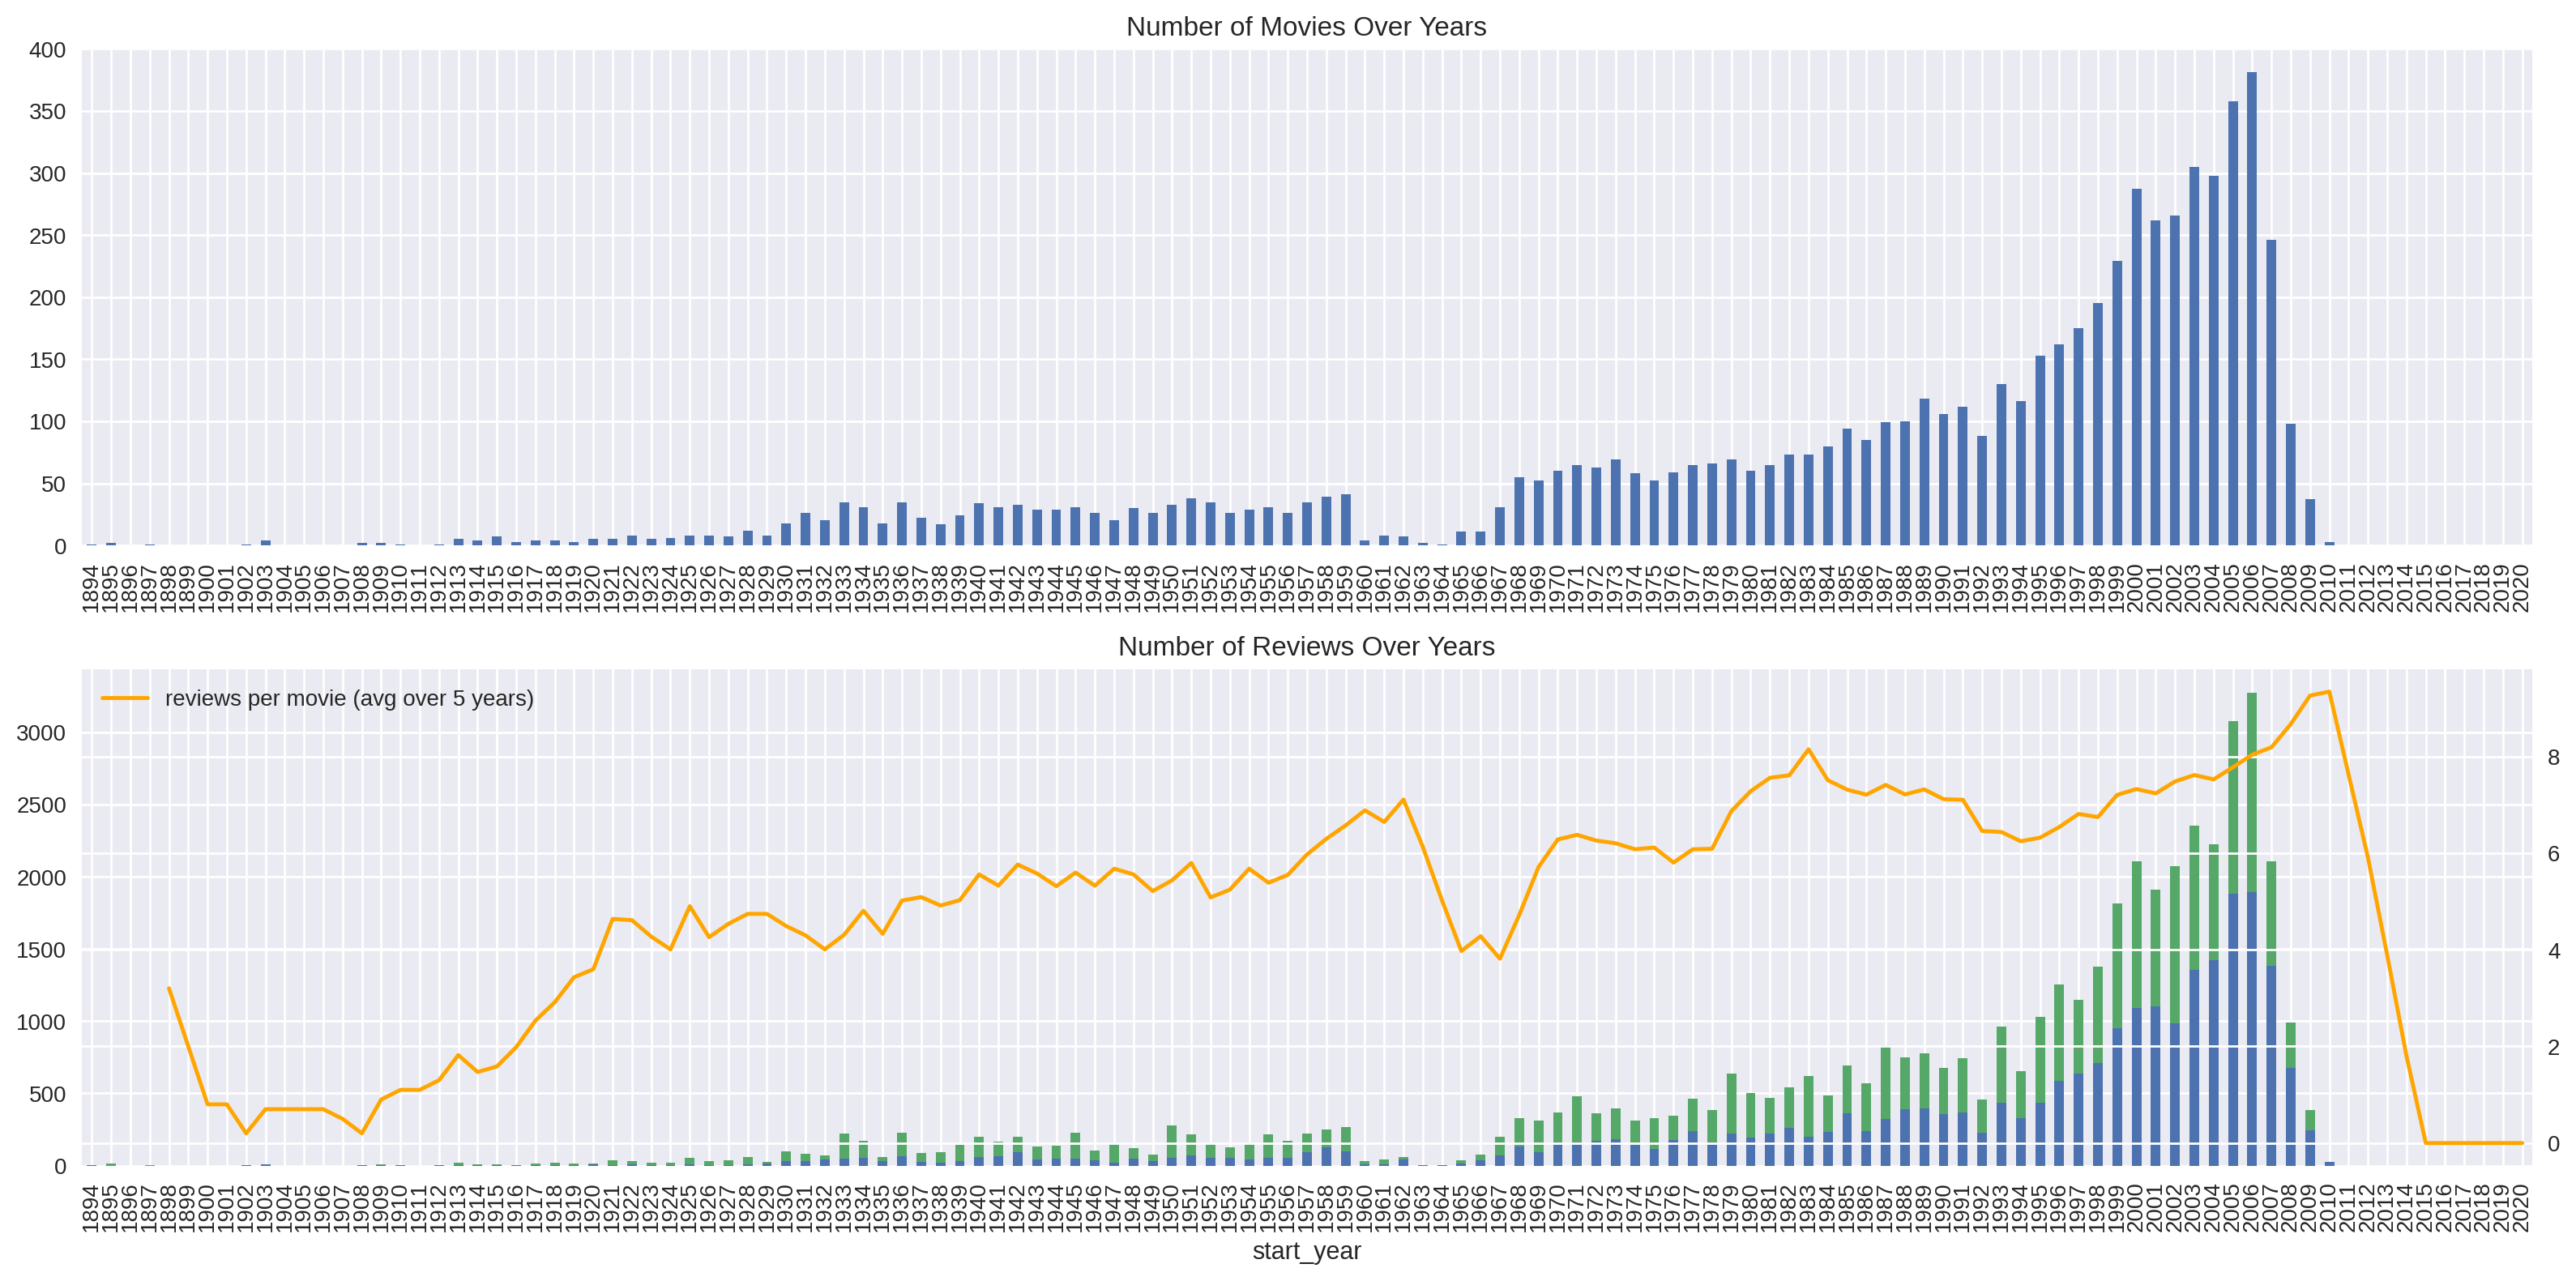

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

***Both movie production and review numbers show similar trends, with growth peaking around the mid_2000s followed by a decline.\
The rise in the orange line hints at increasing audience and digital interaction over the years***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Nice charts! So we can see a steady increase in the number of movies. The avgerage number of reviews also increases.

</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

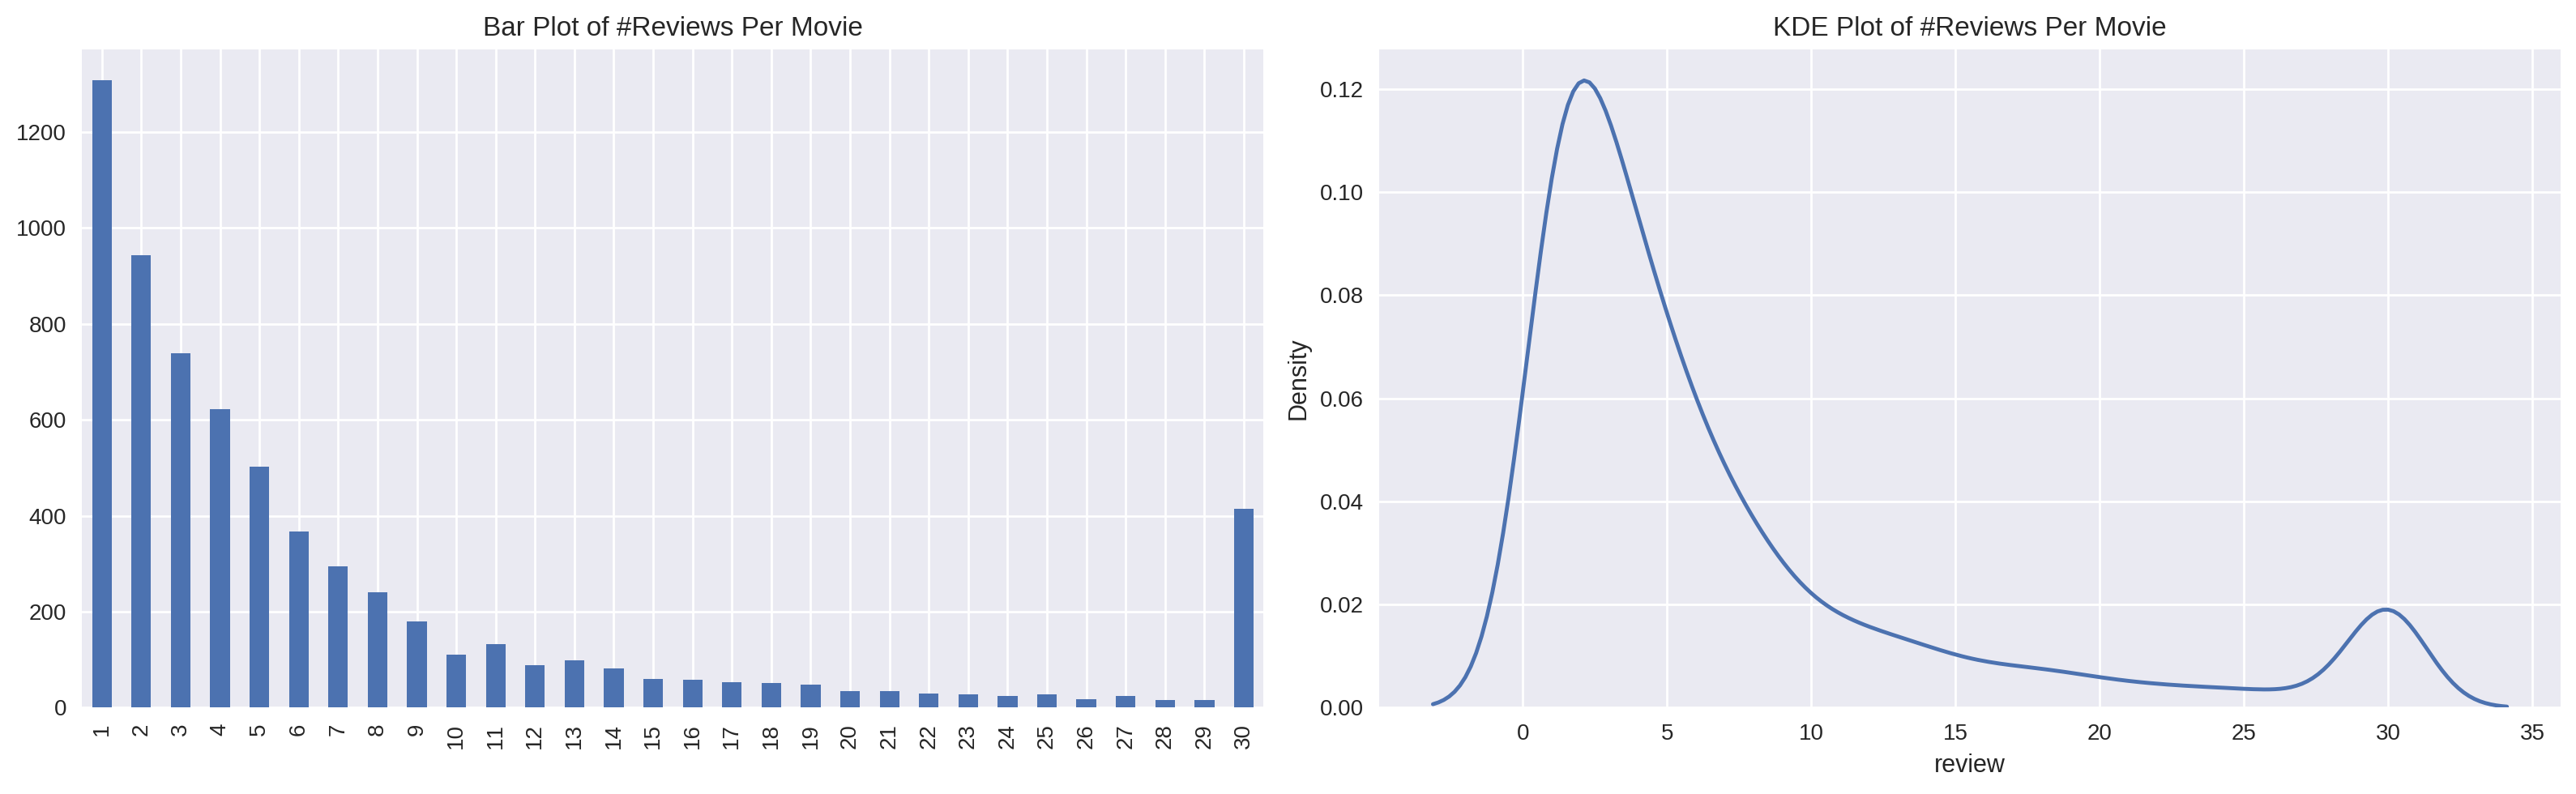

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

***Most movies have a low review count,while a few movies dominate with a very high number of reviews.The small number of movies with hundreds of reviews could be explained by factors such as : popularity or cult status, Major awards or controversis, Franchise association.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Correct.
</div>

In [15]:
df_reviews['pos'].value_counts()

0    23715
1    23614
Name: pos, dtype: int64

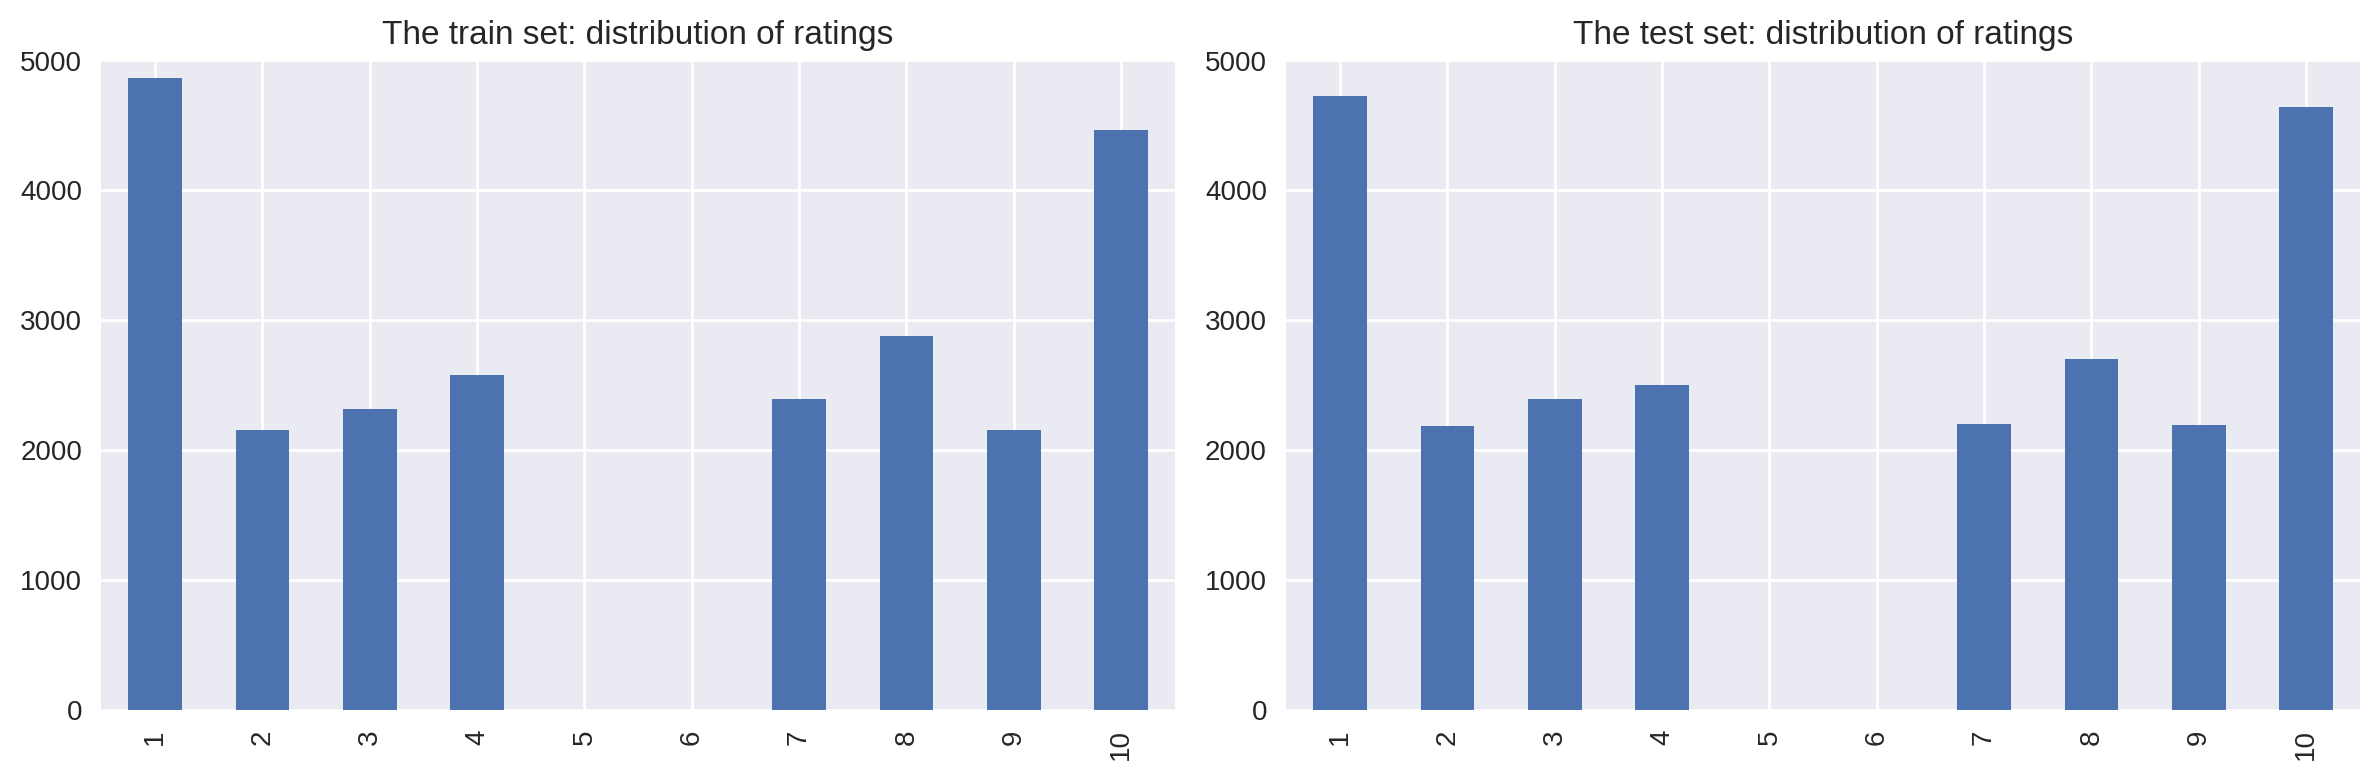

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

***A balanced split of the data.\
The absence or low frequency of ratings(5,6) might indicates systematic bias in how ratings were collected or processed.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>


So the distrbutions of the training and test sets are quite similar. 

</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
So what can we say about the distribution? 
</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


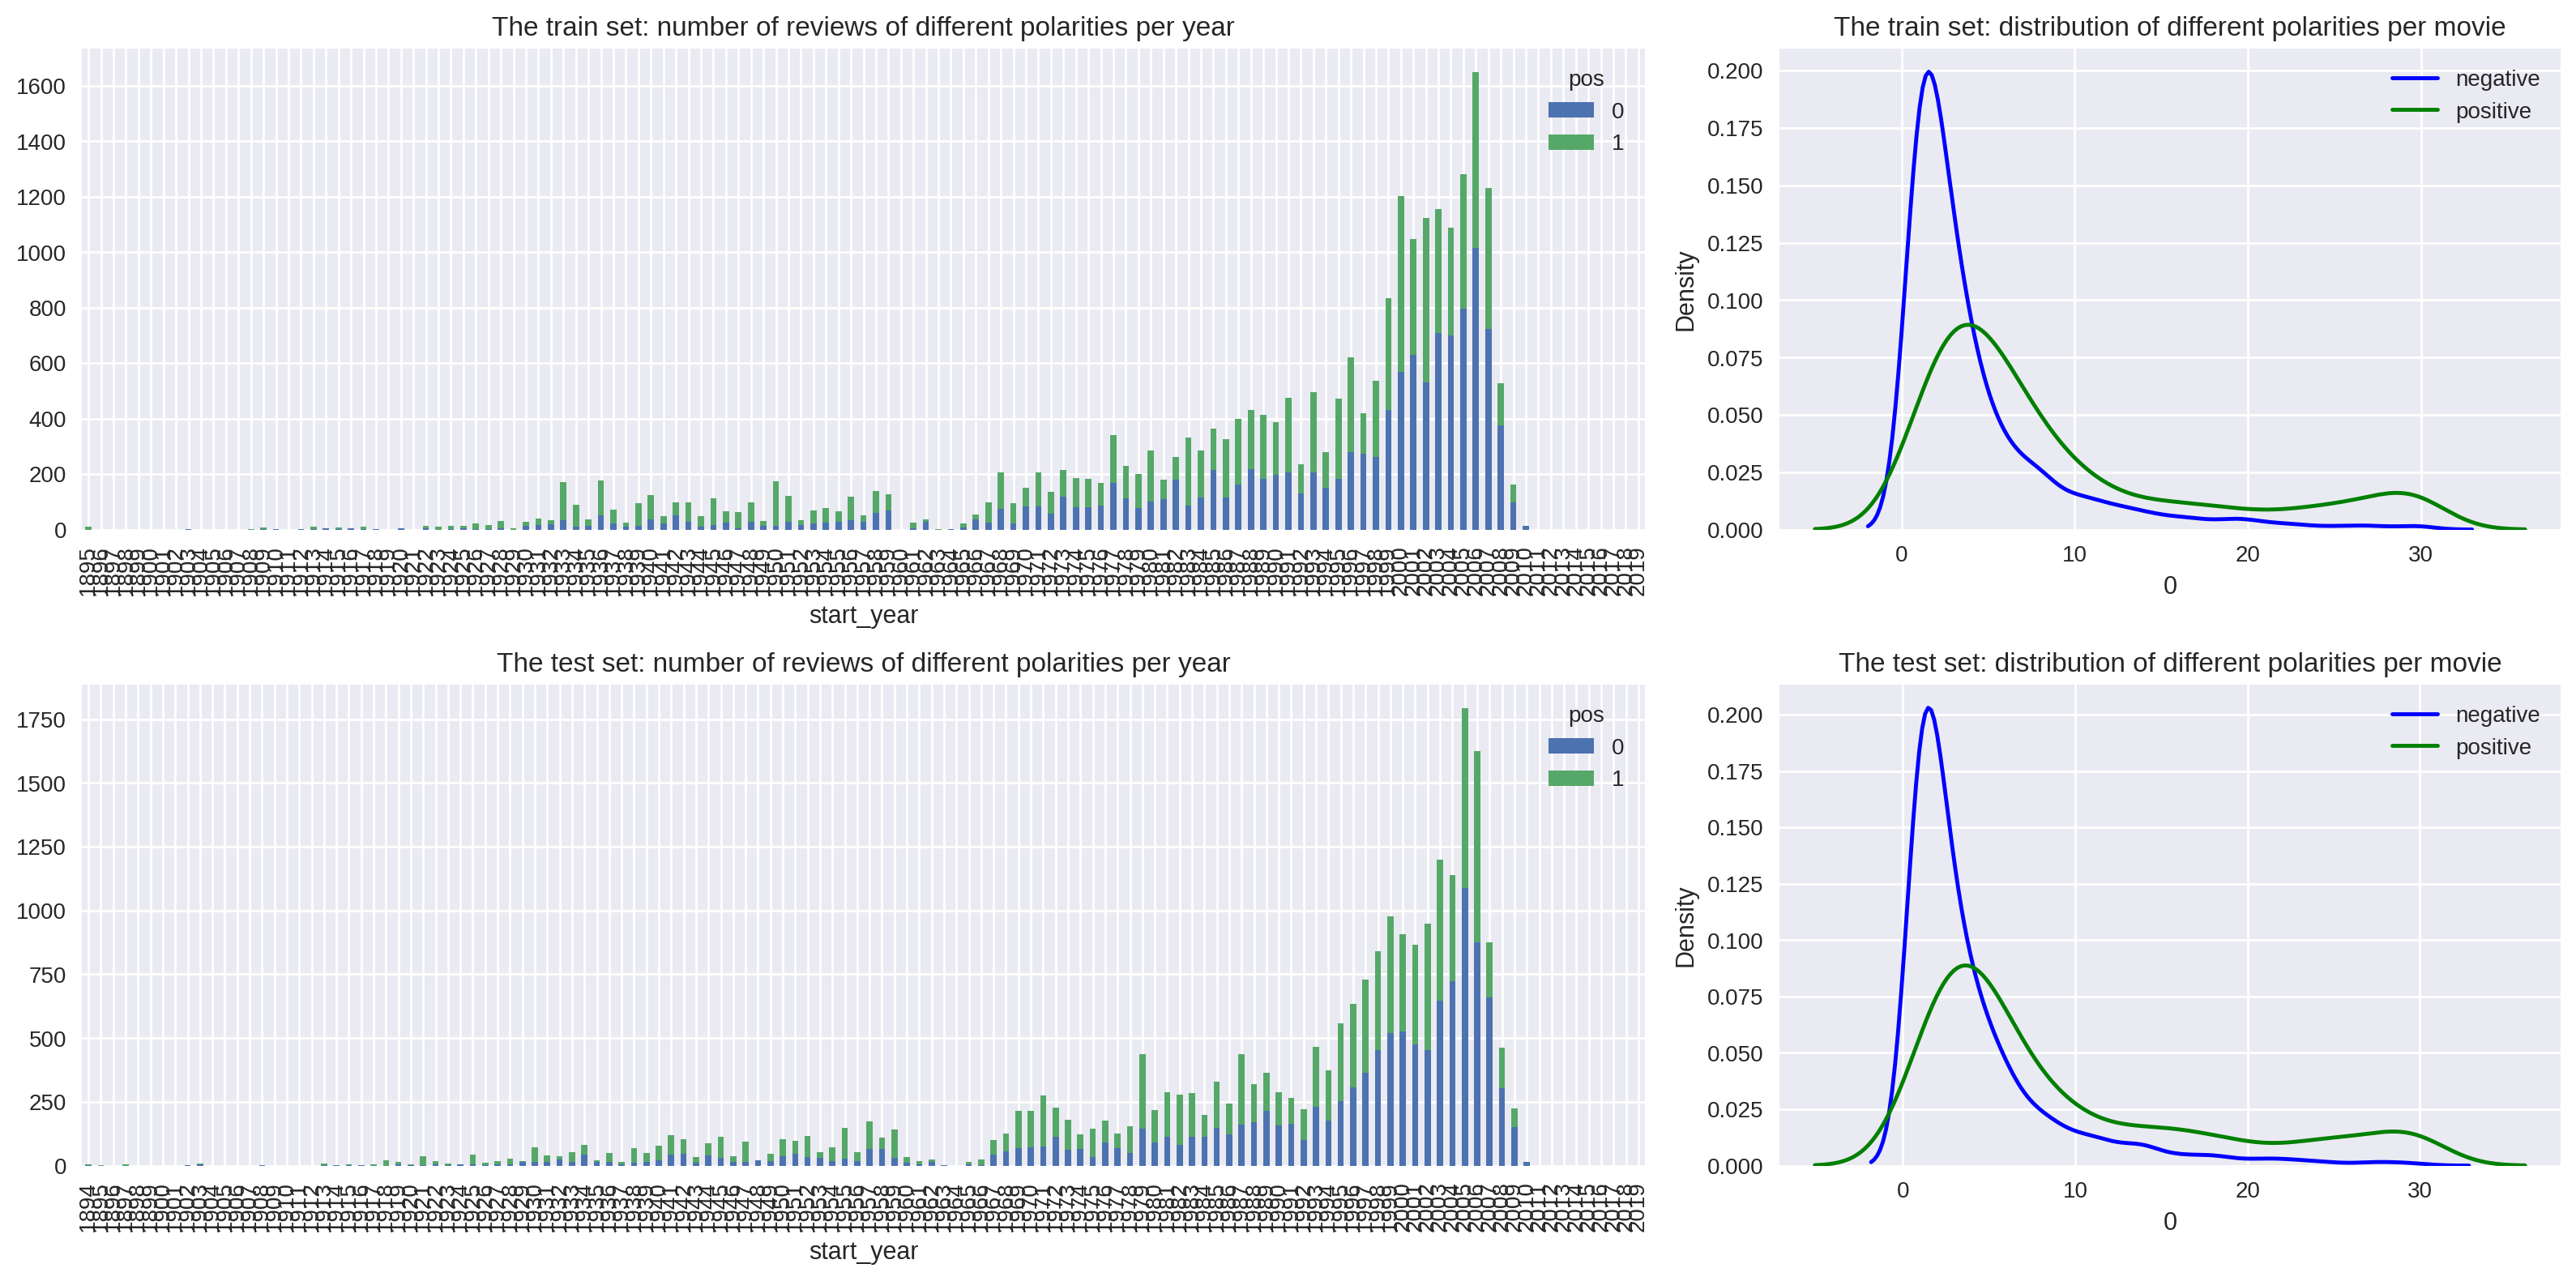

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

***A consisting pattern between the train and test confirms balanced splitting, ensuring reliability in model evaluation.\
Many movies reviewed indicateing density clusters close to zero. some of movies generate significant review volumes.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>


Good! </div><div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Very good charts! 
    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
It will be perfect after you add a conclusion.
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [18]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that **type** veriable is green in the function above. When you see that your variables are green, you should think of another name, since green color indicates that this name is reserved in python. I know it was in the precode, but it is a great opportunity to point out this thing. 
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [19]:
import re
# Define normalization function
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '',text)
    text = re.sub(r'\d','',text)
    return text

In [20]:
df_reviews['review_norm'] = df_reviews['review'].apply(normalize_text) # <put your code here>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Nice code!     
</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [21]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct. 

</div>

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF_IDF vectorizer
tfidf_vectorizer =TfidfVectorizer(max_features=10000)

# Tranform the text data
train_features = tfidf_vectorizer.fit_transform(df_reviews_train['review_norm'])
test_features = tfidf_vectorizer.transform(df_reviews_test['review_norm'])

## Working with models

### Model 0 - Constant

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

In [24]:
# Initialize and train DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(train_features, train_target)
dummy_clf.fit(train_features, train_target)
dummy_predictions = dummy_clf.predict(test_features)
dummy_accuracy = accuracy_score(test_target,dummy_predictions)
dummy_f1 = f1_score(test_target, dummy_predictions)

print(f"Dummy Classifier Accuracy:{dummy_accuracy} ")
print(f"Dummy Classifier F1 Score:{dummy_f1} ")

Dummy Classifier Accuracy:0.5015510134704457 
Dummy Classifier F1 Score:0.0 


          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


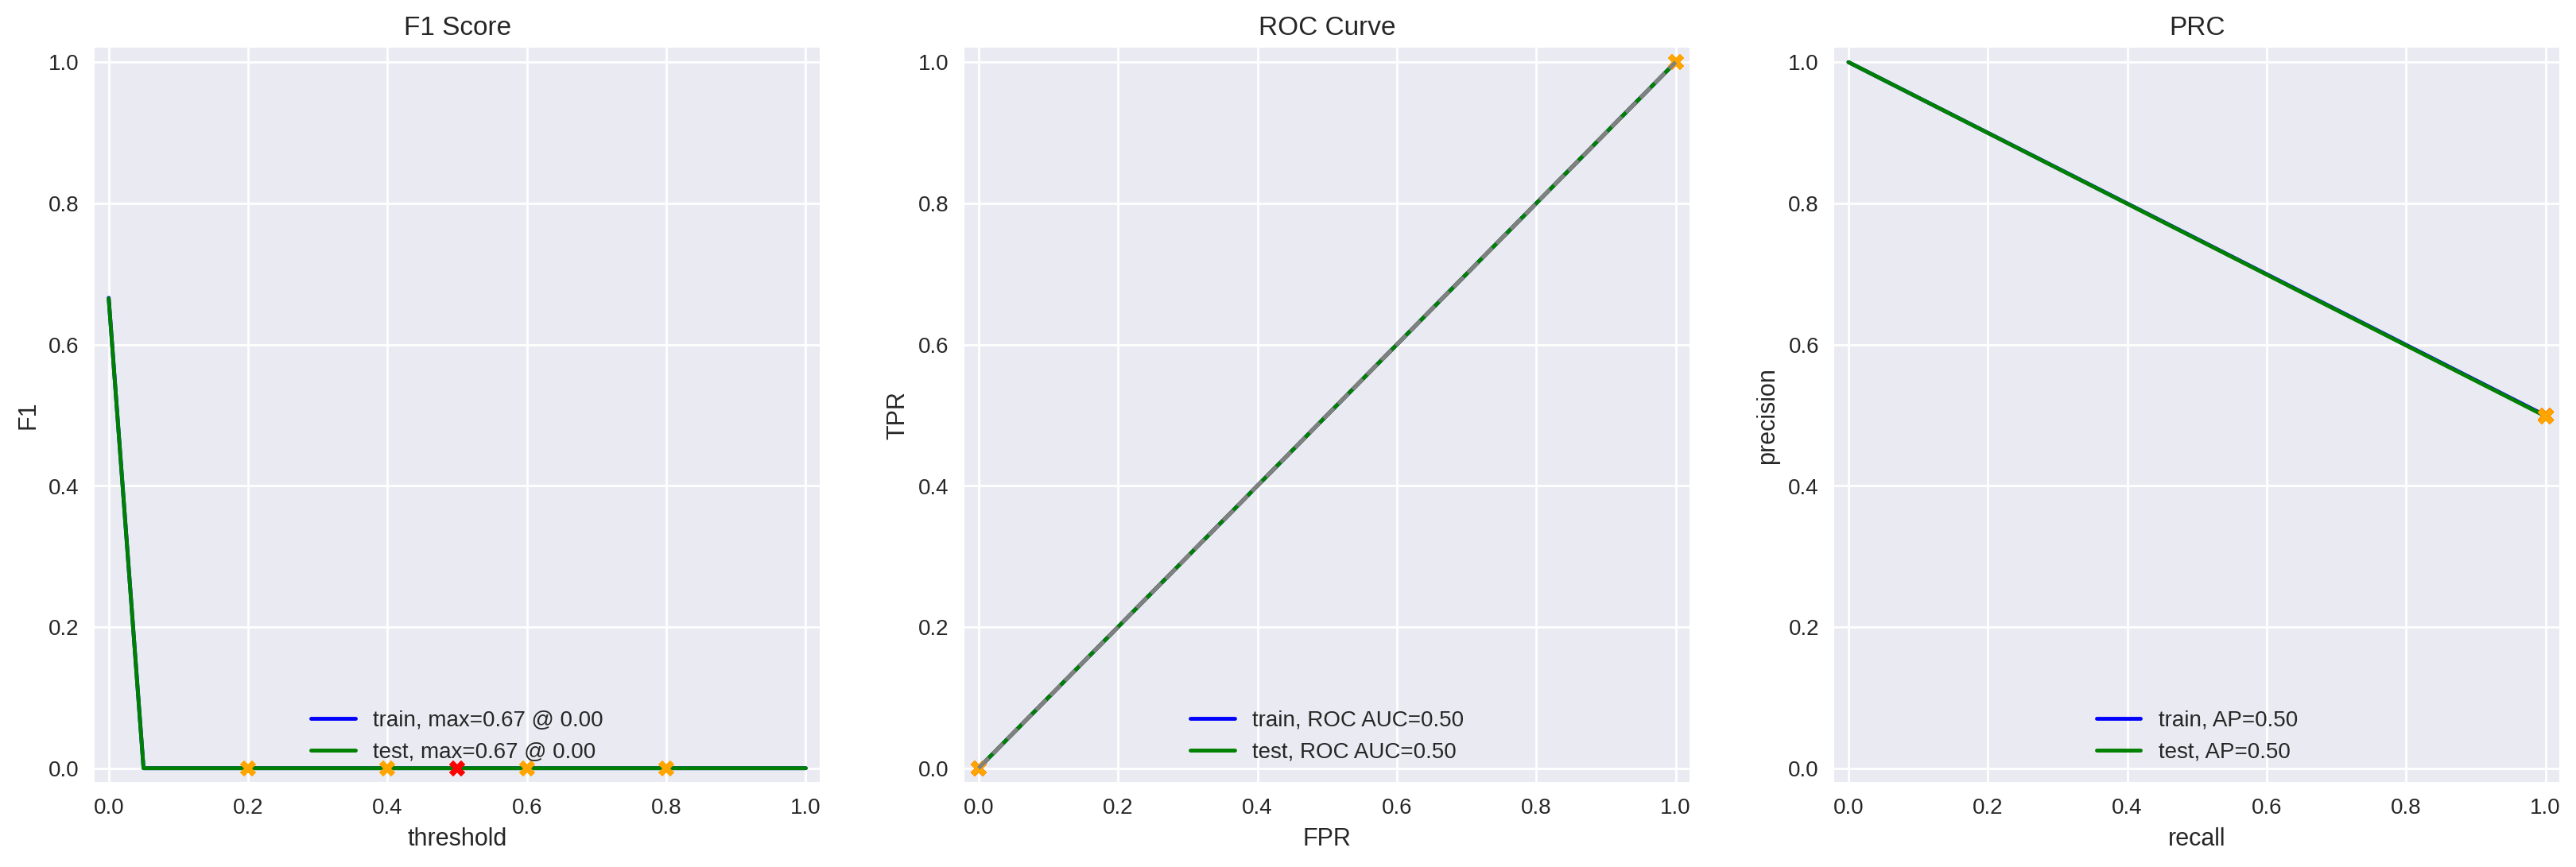

In [25]:
# Evaluate Dummy Classifier 
evaluate_model(dummy_clf, train_features, train_target, test_features, test_target)

***Reflects the fact that the DummyClassifier always with majority class.\
F1 Score indicates that the model is completely unable to predict the minority class.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2  </h2>
    
Good. You can also check the result using different strategy values.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
   
    
- 
> `dummy_clf.fit(train_features, train_target)`
    
    
You don't need to repeat the code. 
    
    
- You can also call the evaluation function here.     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
    
Please add a conclusion here. How does the constant model perform? 
</div>


### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [26]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [27]:
# Define a function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the normalized text column
df_reviews_train['review_clean'] = df_reviews_train['review_norm'].apply(remove_stopwords)
df_reviews_test['review_clean'] = df_reviews_test['review_norm'].apply(remove_stopwords)

In [28]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer_1 = TfidfVectorizer(max_features=10000)

train_features_1 = tfidf_vectorizer_1.fit_transform(df_reviews_train['review_clean'])
test_features_1 = tfidf_vectorizer_1.transform(df_reviews_test['review_clean'])

In [29]:
# Initalize Logistic Regression model
model_1 = LogisticRegression()

# Train the model 
model_1.fit(train_features_1, train_target)

# Make predictions
test_predictions_1 = model_1.predict(test_features_1)
test_probabilites_1 = model_1.predict_proba(test_features_1)[:,1]

# Calculate Matrix
accuracy = accuracy_score(test_target, test_predictions_1)
f1 = f1_score(test_target,test_predictions_1)

print(f"Logistic Regression Accuracy:{accuracy:.2f} ")
print(f"Logistic Regression F1 Score:{f1:.2f} ")

Logistic Regression Accuracy:0.88 
Logistic Regression F1 Score:0.88 


          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


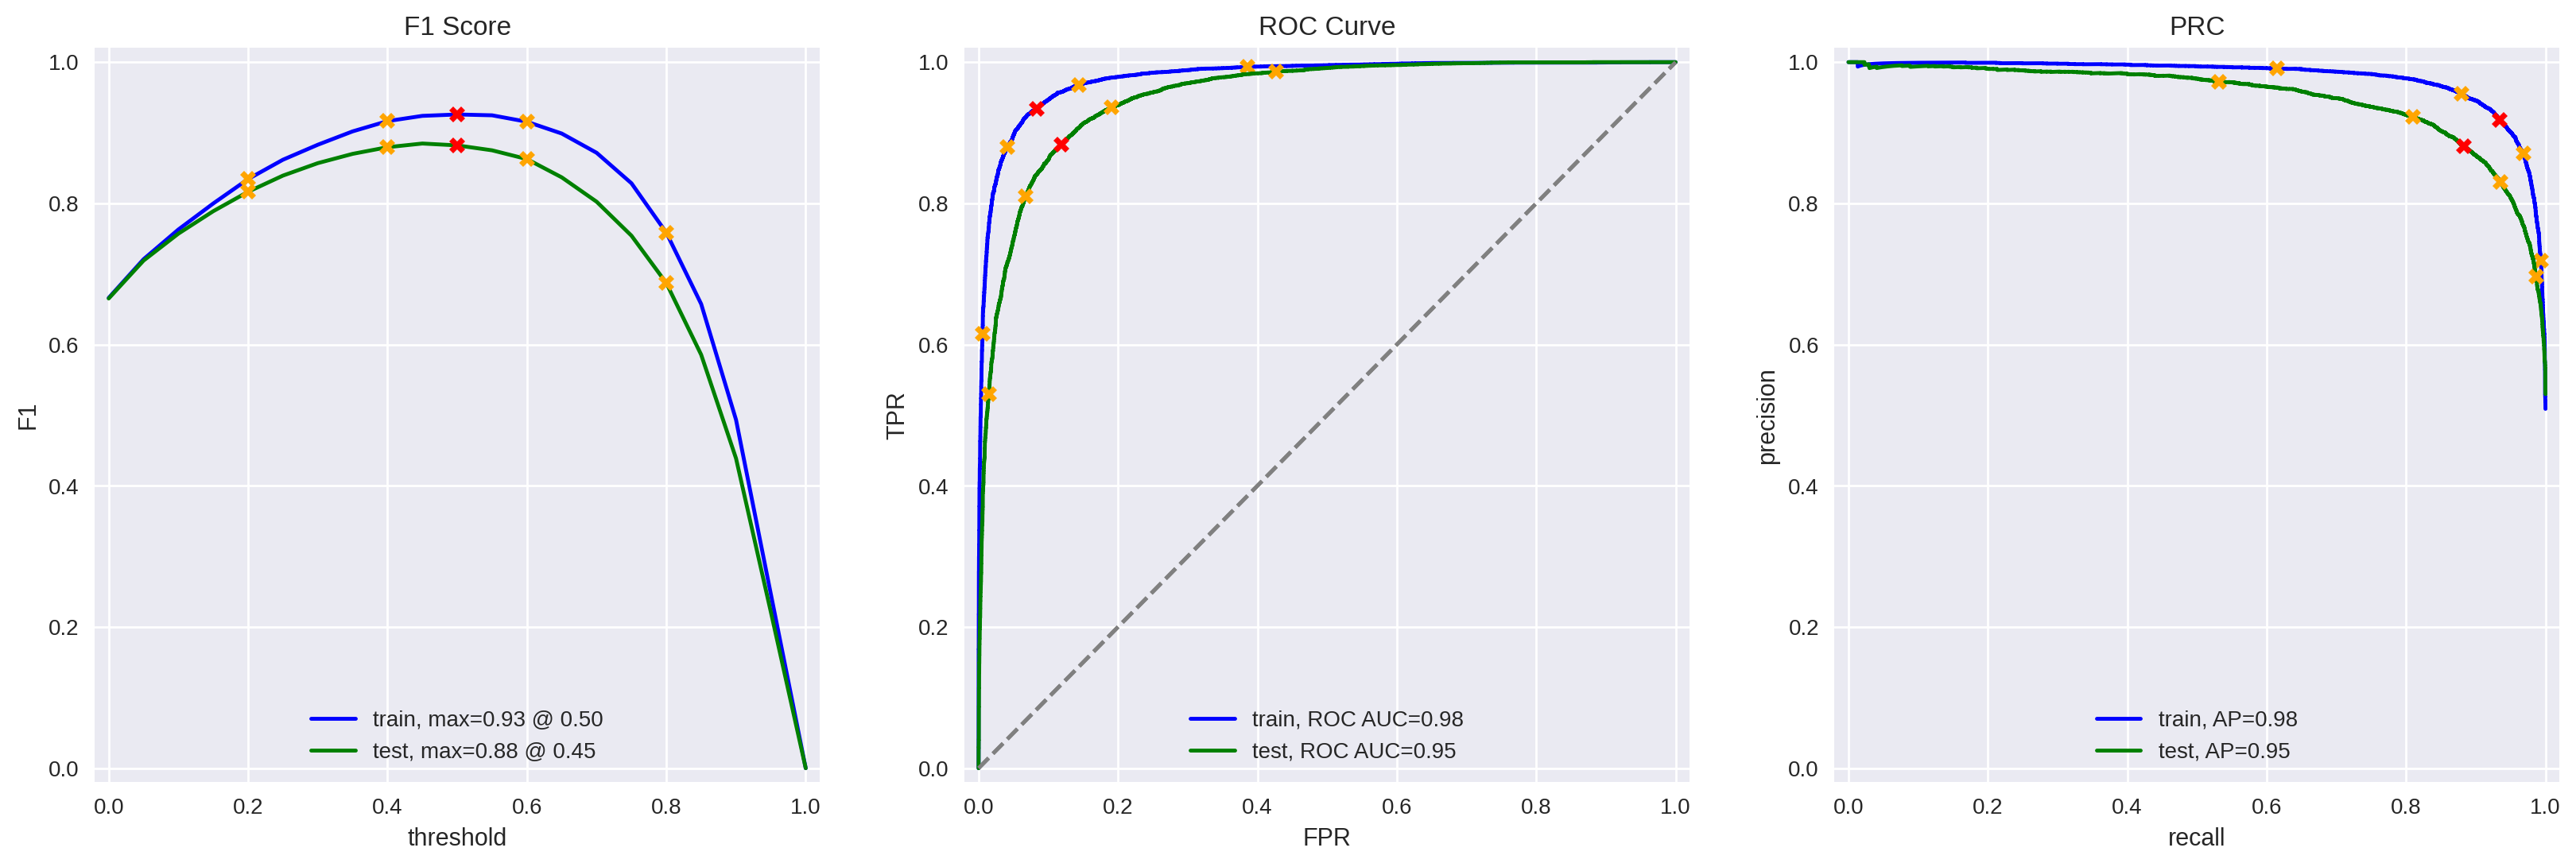

In [30]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

***Training Accuracy (0.93) indicates that the model correnctly predicts sentiment for 93% of the training data.***\
***Traing F1 Score(0.93) indicates that the model balanced precision and recall***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [31]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [32]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [33]:
# Apply preprocessing function in the dataset
df_reviews_train['review_clean'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)
df_reviews_test['teview_clean'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct.
</div>

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer_3 = TfidfVectorizer(max_features=10000)

# Fit and transform the training data; transform the testing data
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_clean'])
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_clean'])

Logistic Regression (Model 3) Accuracy:0.8646581396337059 
Logistic Regression (Model 3) F1:0.8653561614880575 
          train  test
Accuracy   0.92  0.86
F1         0.92  0.87
APS        0.97  0.93
ROC AUC    0.97  0.94


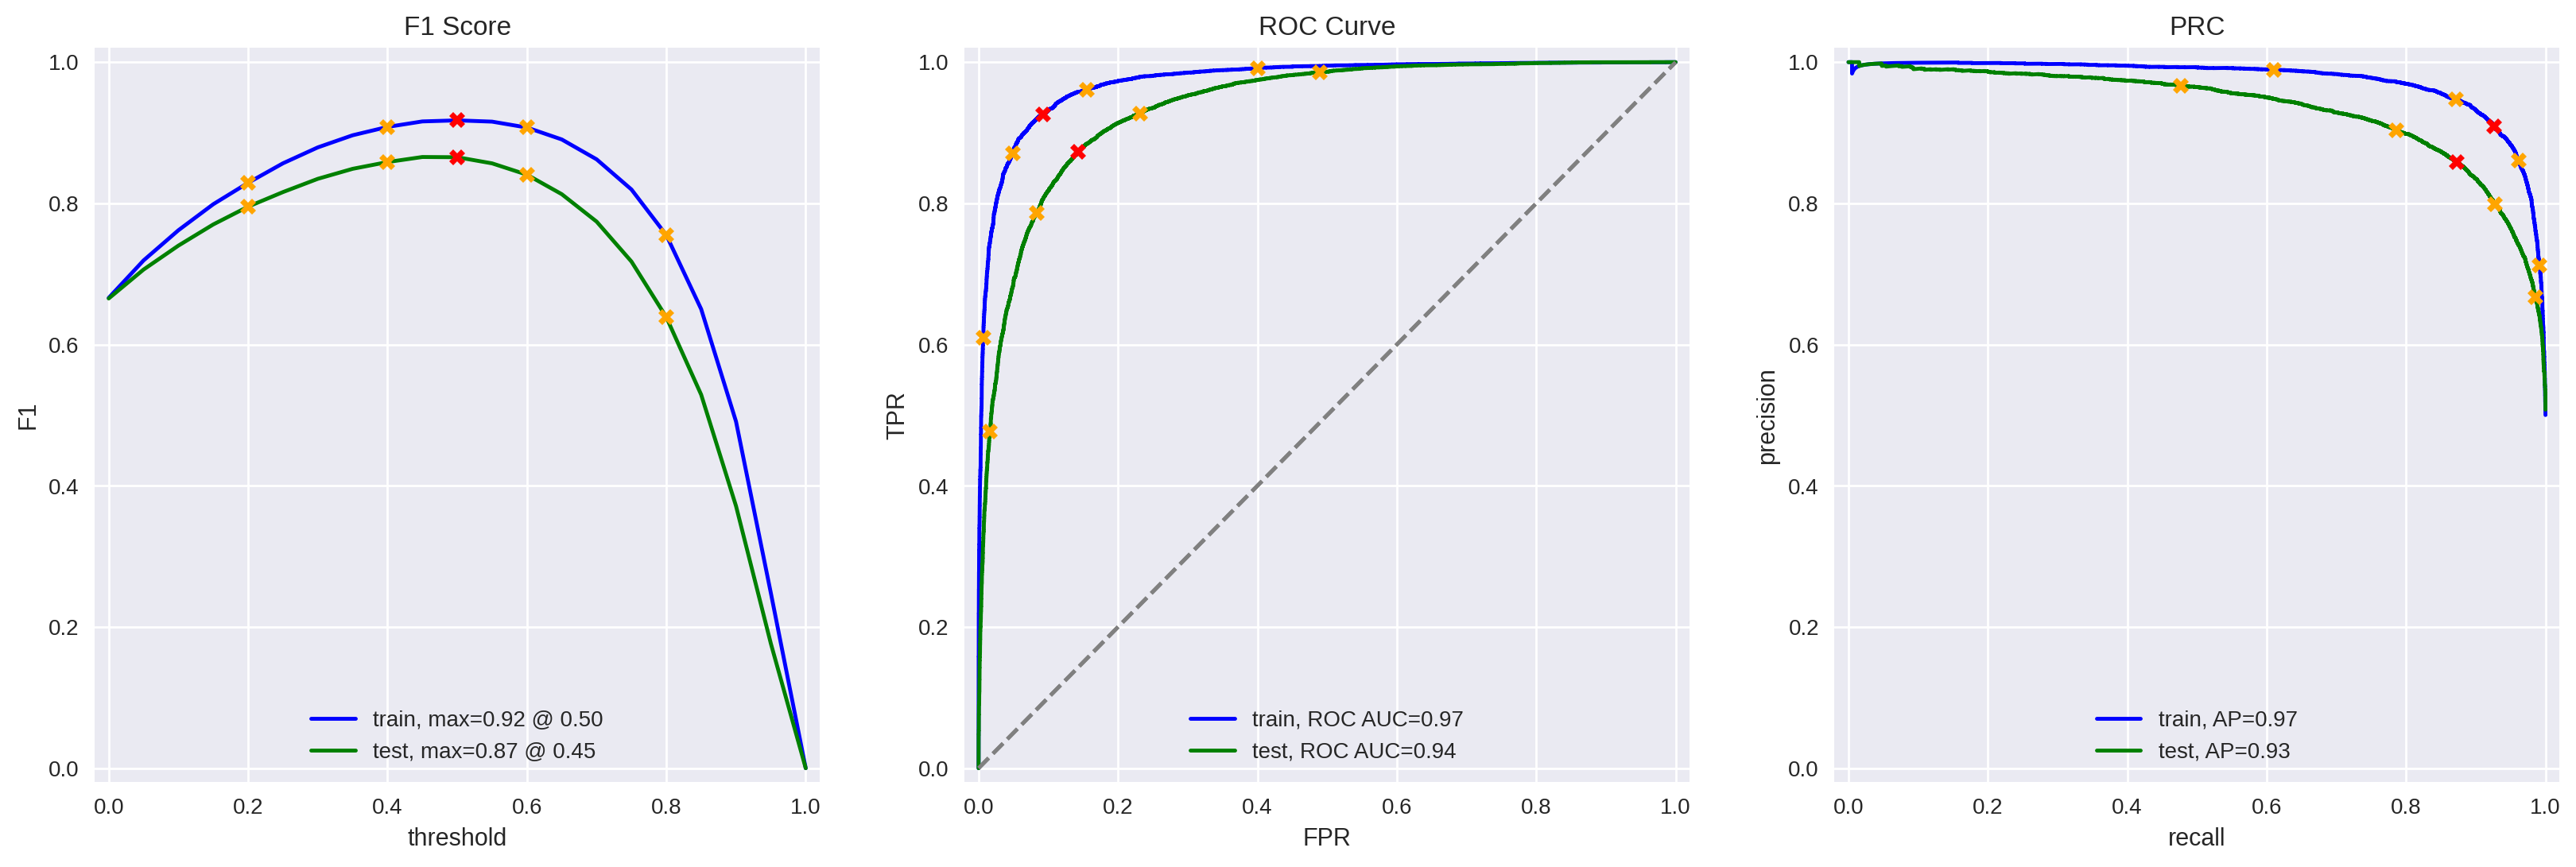

In [35]:
from sklearn.linear_model import LogisticRegression

#Initialize Logistic Regression model
model_3 = LogisticRegression()

# Train the model on the training set
model_3.fit(train_features_3, train_target)

# Make Predictions on the test set
test_predictions_3 = model_3.predict(test_features_3)
test_probabilities_3 = model_3.predict_proba(test_features_3)[:,1]

# Evaluate performance metrics
accuracy = accuracy_score(test_target, test_predictions_3)
f1 = f1_score(test_target, test_predictions_3)

print(f"Logistic Regression (Model 3) Accuracy:{accuracy} ")
print(f"Logistic Regression (Model 3) F1:{f1} ")

# Use custom evaluattion function
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)


***Test Accuracy 0.86, reflecting well predictions across diverse reviews.\
Test F1 Score .87 demonstrating strong balance between precision and recall.\
TF-IDF successfull transform text into vcetors.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct! 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
It will be perfect after you add a conclusion :) 
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  2 </h2>
    
Perfect! 

</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [37]:
from lightgbm import LGBMClassifier
import spacy

# Load spacy model
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

# Defie text preprocessing function with lemmatization
def text_preprocessing_4(text):
    doc = nlp(text)
    tokens =[token.lemma_ for token in doc]
    return ' '.join(tokens)

In [38]:
# Apply preprocessing function in the dataset
df_reviews_train['review_clean'] = df_reviews_train['review_norm'].apply(text_preprocessing_4)
df_reviews_test['review_clean'] = df_reviews_test['review_norm'].apply(text_preprocessing_4)

In [39]:
# Initialize TF-IDF
tfidf_vectorizer_4 = TfidfVectorizer(max_features=10000)

# transform train and test datasets
train_features_4 = tfidf_vectorizer_4.fit_transform(df_reviews_train['review_clean'])
test_features_4 = tfidf_vectorizer_4.transform(df_reviews_test['review_clean'])

LightGBM Accuracy (Model_4):0.8595164237453788 
LightBGM F1 Score (Model_4:0.8605416350291065 )
          train  test
Accuracy   0.92  0.86
F1         0.92  0.86
APS        0.98  0.93
ROC AUC    0.98  0.94


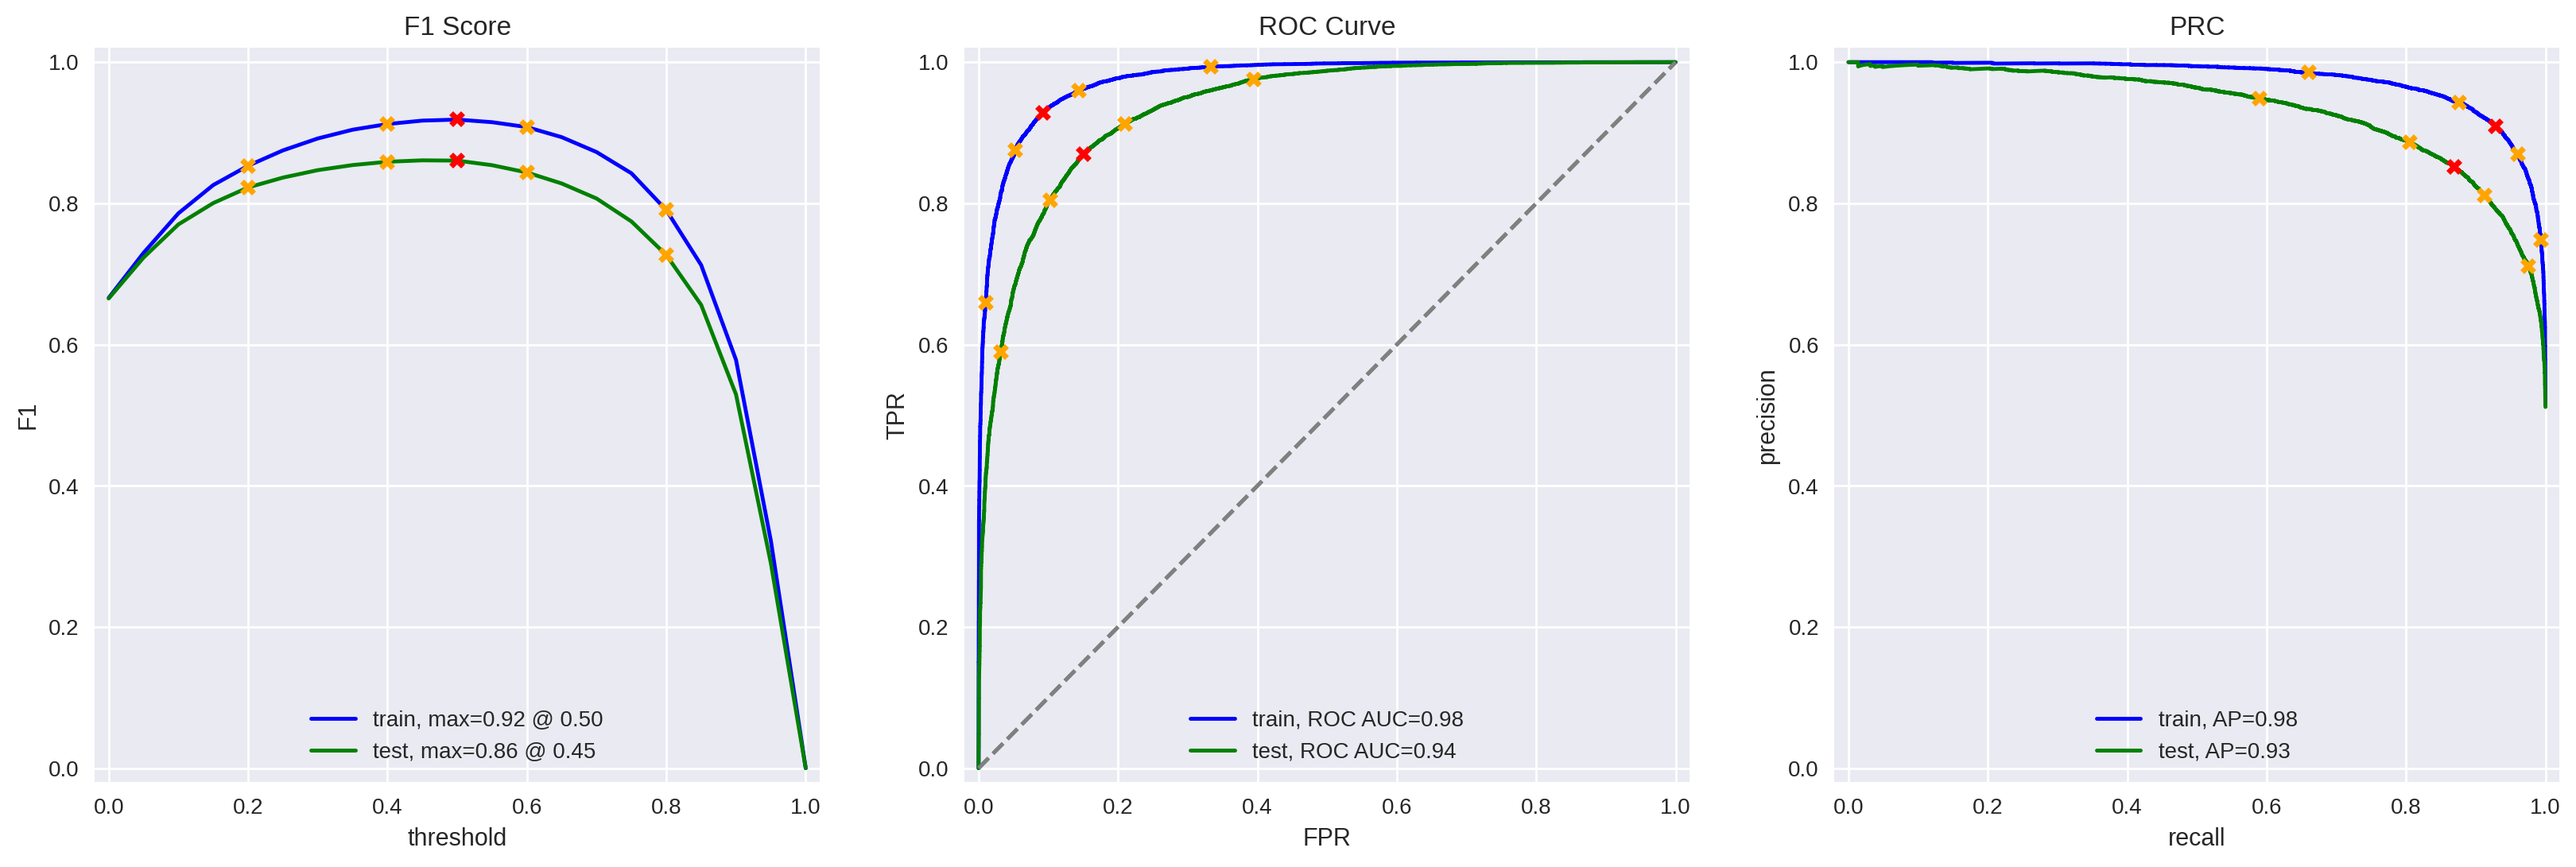

In [40]:
# Initialize LightGBM Classifier
model_4 = LGBMClassifier(boosting_type='gbdt', n_estimators=100, learning_rate=0.1)
# Train the model
model_4.fit(train_features_4, train_target)

# make predictions
test_predictions_4 = model_4.predict(test_features_4)

# Calculate metrics
accuracy = accuracy_score(test_target, test_predictions_4)
f1 = f1_score(test_target, test_predictions_4)

print(f"LightGBM Accuracy (Model_4):{accuracy} ")
print(f"LightBGM F1 Score (Model_4:{f1} )")

# Evaluate model 
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

***Test Accuracy 0.86, reflecting well predictions across diverse reviews.\
Test F1 Score .87 demonstrating strong balance between precision and recall.\
TF-IDF successfull transform text into vcetors.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Looks great!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Would you add a conclusion please?     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Excellent! </div>

## My Reviews

In [41]:
my_reviews = pd.DataFrame([
    'The pakage implies that Warren Beatty and Gold...',
    'How the hell did they get this made?! Presenti...',
    'There is no real story the film seems more lik...',
    'Um .... a serious film about troubled teens in...',
    'I\'m totally agree with GarryJohal from Singapo...',
    'This is the first movie I\'ve seen from Singapo...',
    'Yes non-Singaporean\'s can\'t see what\'s the big...',
    'This true story of Carlson\'s Raiders is more o...',
    'Should have been titled \'Balderdash!\' Little i...',
    'The movie \'Gung Ho!\': The Story of Carlson\'s M...'
], columns=['review'])
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)
print(my_reviews)

                                              review  \
0  The pakage implies that Warren Beatty and Gold...   
1  How the hell did they get this made?! Presenti...   
2  There is no real story the film seems more lik...   
3  Um .... a serious film about troubled teens in...   
4  I'm totally agree with GarryJohal from Singapo...   
5  This is the first movie I've seen from Singapo...   
6  Yes non-Singaporean's can't see what's the big...   
7  This true story of Carlson's Raiders is more o...   
8  Should have been titled 'Balderdash!' Little i...   
9  The movie 'Gung Ho!': The Story of Carlson's M...   

                                      review_norm  
0  the pakage implies that warren beatty and gold  
1    how the hell did they get this made presenti  
2  there is no real story the film seems more lik  
3      um  a serious film about troubled teens in  
4   im totally agree with garryjohal from singapo  
5   this is the first movie ive seen from singapo  
6      yes nonsinga

In [ ]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

#my_reviews = pd.DataFrame([
    ## 'Well, I was bored and felt asleep in the middle of the movie.',
    #'I was really fascinated with the movie',    
    #'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
   # 'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
   # 'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
   # 'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
   # 'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
#], columns=['review'])

#my_reviews['review_norm'] = # <put here the same normalization logic as for the main dataset>

#my_reviews

### Model 1

In [42]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.49:  the pakage implies that warren beatty and gold
0.43:  how the hell did they get this made presenti
0.41:  there is no real story the film seems more lik
0.64:  um  a serious film about troubled teens in
0.31:  im totally agree with garryjohal from singapo
0.81:  this is the first movie ive seen from singapo
0.41:  yes nonsingaporeans cant see whats the big
0.73:  this true story of carlsons raiders is more o
0.38:  should have been titled balderdash little i
0.42:  the movie gung ho the story of carlsons m


### Model 3

In [43]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.56:  the pakage implies that warren beatty and gold
0.25:  how the hell did they get this made presenti
0.16:  there is no real story the film seems more lik
0.52:  um  a serious film about troubled teens in
0.39:  im totally agree with garryjohal from singapo
0.73:  this is the first movie ive seen from singapo
0.63:  yes nonsingaporeans cant see whats the big
0.71:  this true story of carlsons raiders is more o
0.20:  should have been titled balderdash little i
0.49:  the movie gung ho the story of carlsons m


### Model 4

In [44]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.68:  the pakage implies that warren beatty and gold
0.51:  how the hell did they get this made presenti
0.47:  there is no real story the film seems more lik
0.73:  um  a serious film about troubled teens in
0.68:  im totally agree with garryjohal from singapo
0.79:  this is the first movie ive seen from singapo
0.65:  yes nonsingaporeans cant see whats the big
0.76:  this true story of carlsons raiders is more o
0.67:  should have been titled balderdash little i
0.68:  the movie gung ho the story of carlsons m


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Nice results! 
</div>


### Model 9

In [ ]:
#texts = my_reviews['review_norm']

#my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

#my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

#for i, review in enumerate(texts.str.slice(0, 100)):
   # print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Yes, Bert is a hard thing to handle, so we should use GPU for it. By the way, you can use Colab for your practice tasks. It has some free GPU.

</div>

## Conclusions

***Regorous Preprocessing, feature engineering and model training successfully classified IMDB movie reviews with high accuracy an F1 scores. LR provided to be a reliable basline, while LighGBM offered advanced capabilites sentiment clssification. TF-IDF extraction were pivotal for robust model performance.***

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Very good!     
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
You can make it a bit broader though. For instance, you can outline the results you get when you run and test each model.     
</div>

# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions